# Processo Seletivo Cientista de Dados Jr

**Candidato:** Gabriel da Cruz Oliveira

> **Especificação Técnica**

**Objetivo:** 

Criar modelo de aprendizado de máquina capaz
de classificar as amostras do conjunto de dados **dataset_cdjr.parquet.gzip**

**Dataset:** Para desenvolvimento desse projeto, será utilizado o dataset disponibilizado no Google Drive
chamado *dataset_cdjr.parquet.gzip*. Disponível em: <https://drive.google.com/file/d/1HXq9mczY-5OpFaXK3kk8zAgFEgEgF3jt/view>

**Formato:** A base de dados está em formato GZIP com colunas contendo dados em int e outras em float, composto inicialmente por 16 features (feature0, feature1, …, feature 15) e uma coluna target, que é a classe conforme descrito abaixo:

0.  feature0 -> float64
1.  feature1 -> int64
2.  feature2 -> float64
3.  feature3 -> float64
4.  feature4 -> float64
5.  feature5 -> float64
6.  feature6 -> int64
7.  feature7 -> float64
8.  feature8 -> float64
9.  feature9 -> int64
10. feature10-> float64
11. feature11-> float64
12. feature12-> float64
13. feature13-> float64
14. feature14-> float64
15. feature15-> int64
16. target   -> int64

**Métodos de Pŕe-processamento e Modelagem:** O dataset escolhido contem um conjunto de dados de 466 entradas. Sendo assim, na etapa de pré-processsamento vamos verificar a possibilidade dos seguintes passos:

*  Verificação, remoção ou inclusão de dados faltantes
*  Remoção de colunas irrelevantes
*  Codificar os dados categóricos
*  Renomear colunas

**Tarefa de Aprendizado:** Será aplicado a tarefa de Classificação.

**Algoritmos Avaliados:** Para prever os eventos do target iremos utilizar o modelo de Regressão Logistica e XGBoost(Classifier).

**Métricas de Avaliação:** Matriz de confusão.


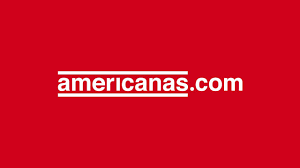

## Importando os dados

Os dados que usaremos neste projeto foram disponibilizados no Google Drive pela recrutadora. O dataset representa valores númericos que variam entre int e float contendo 466 linhas.

Como você pode notar, este é um conjunto de dados balanceado, mais a frente iremos verificar a distribuição de classe.

Outro detalhe interessante é que as features são todas numéricas, e foram descaracterizadas (por questões ligados à privacidade e segurança). Assim, os nomes das colunas são representados por [feature0,feature1,feature2…,target]

Não é possível saber se as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes. Para saber mais sobre PCA clique nesse [link](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf)

In [1]:
#Importar os pacotes necessários

#Pacotes de manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

#Pacotes de machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

#Não obter mensagens de avisos
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Agora vamos importar o conjunto de dados usando o método pd.read_parquet(), iremos utilizar esse método porque o arquivo está compactado em gzip.
O uso da variável df para instanciar o arquivo é utilizado como covenção, nesse caso iremos utilizar o mesmo conceito.

In [2]:
#Importando o dataset
arquivo = r'./dataset/dataset_cdjr.parquet.gzip'
df = pd.read_parquet(arquivo)

#Verificando tamanho do dataset em linhas e colunas

print('O dataset contém {} linhas e {} colunas.'.format(df.shape[0],df.shape[1]))

O dataset contém 466 linhas e 17 colunas.


## Análise Exploratória

Apenas olhando as cinco primeiras entradas podemos ter visibilidade de como está organizado o dataset.

 * Pelo índice podemos avaliar que o dataset foi modificado antes havia mais registros.

A variável alvo está representada na coluna target, onde:

* **0**: Não ocorreu o evento
* **1**: Ocorreu o evento

In [3]:
#Ver as 5 primeiras entradas

df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


In [4]:
#Visualizando as 5 ultimas linhas do dataset

df.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
490,1300.0,7,12133.73,244.30,-1081.90,0.395307,2642,0.008152,11.617895,324081,17343.28,0.699621,12.893827,0.030659,149.799136,81,0
175,350.0,1,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0,1
417,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7,0
131,150.0,1,0.00,114.30,-35.70,0.300000,119,0.003834,0.000000,31040,334.59,0.000000,0.000000,0.000000,0.000000,0,0
92,50.0,1,0.00,-1.00,-51.00,1.961538,26,0.002537,0.000000,10250,0.00,0.000000,0.000000,0.000000,0.000000,0,1


In [5]:
#Ver o resumo estatístico

df.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,438.743562,4.847639,1244.322468,44.600880,-434.299893,0.473991,979.070815,0.113885,3.857010,2.164378e+05,6930.456438,0.437333,61.886190,0.008634,87.713360,10.313305,0.557940
std,984.593065,6.836679,3558.699033,122.093515,975.555198,0.452261,1460.738442,1.873746,15.609132,3.508622e+05,17581.800818,3.442094,142.521523,0.017866,145.426437,33.625204,0.497165
min,0.000000,0.000000,0.000000,-645.870000,-15506.350000,0.150000,1.000000,0.000663,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1.000000,0.000000,-0.400000,-492.035000,0.173669,133.500000,0.003318,0.000000,2.113100e+04,383.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,2.000000,169.830000,18.360000,-154.525000,0.303854,420.000000,0.005127,0.937082,8.532850e+04,1410.855000,0.082515,19.692568,0.003207,72.524286,2.000000,1.000000
75%,500.000000,6.000000,1017.375000,44.630000,-50.180000,0.569848,1238.750000,0.009699,2.815824,2.645035e+05,5212.977500,0.311311,65.498098,0.009515,127.301505,8.000000,1.000000
max,15400.000000,31.000000,40291.240000,1521.900000,-0.260000,3.150000,11731.000000,40.000000,281.666667,3.366472e+06,237182.780000,73.080634,2232.100000,0.204611,2154.000000,541.000000,1.000000


* Utilizando o metódo describe() podemos verificar que na coluna target possuímos valores de somente 1 ou 0;
* Algumas features possuem outliers mínimos e máximos, entendendo a natureza delas poderíamos entender o motivo;
* Vamos manter o nome das colunas originais para manter o padrão de avaliação dos recrutadores;
* Não será necessário codificar visto que elas não possuem nenhum valor categórico.
* A feature10 possui em seu Q3(75%) 5212.977500 e seu máximo é 237182.780000, claramente temos outliers nesse dataset. É possível perceber outliers também em outras features.


## Identificando as váriaveis

Vamos utilizar o metódo info() para ter informações das variáveis.

In [6]:
#Identificando as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 337 to 92
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   466 non-null    float64
 1   feature1   466 non-null    int64  
 2   feature2   466 non-null    float64
 3   feature3   466 non-null    float64
 4   feature4   466 non-null    float64
 5   feature5   466 non-null    float64
 6   feature6   466 non-null    int64  
 7   feature7   466 non-null    float64
 8   feature8   466 non-null    float64
 9   feature9   466 non-null    int64  
 10  feature10  466 non-null    float64
 11  feature11  466 non-null    float64
 12  feature12  466 non-null    float64
 13  feature13  466 non-null    float64
 14  feature14  466 non-null    float64
 15  feature15  466 non-null    int64  
 16  target     466 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 65.5 KB


In [7]:
# Verificar se há valores ausentes

df.isnull().sum().max()

0

* Usando o comando df.info() tivemos como resposta as 16 variáveis(colunas) e 466 entradas. Essas variáveis são somente númericas.

* Variáveis categóricas: Não existe.
* Variáveis númericas: Todas as features e a target.

* O dataset não possui dados nulos em qualquer váriavel,não precisando realizarmos tratativas de inclusão ou remoção para dados faltantes.


1    260
0    206
Name: target, dtype: int64

Eventos realizados Representam 55.79% do dataset. 

Eventos não realizados Representam 44.21% do dataset.


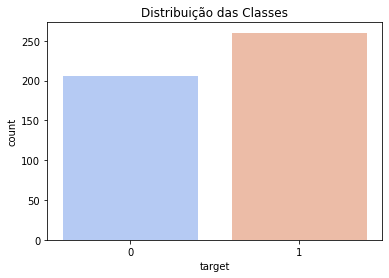

In [8]:
#Ver o balanceamento das classes

print(df.target.value_counts())
print("\nEventos realizados Representam {:.2f}% do dataset. \n".format((df[df.target ==1].shape[0]/df.shape[0])*100))
print("Eventos não realizados Representam {:.2f}% do dataset.".format((df[df.target ==0].shape[0]/df.shape[0])*100))

# plotar gráfico de barras para as Classes

fig, ax = plt.subplots()
sns.countplot('target',data=df,ax=ax,palette='coolwarm')
ax.set_title("Distribuição das Classes")
plt.plot();

* Podemos concluir que as classes estão bem distribuidas, não necessitando realizar balanceamento. Essa etapa é importante pois caso estivessem desbalanceadas, poderiamos ter discrepância no treino do modelo podendo ocorrer um overfitting ou underfitting.

* Existem domínios que são naturalmente desbalanceados e não faz sentido balancear ou corrigir, no nosso caso como temos 260/206 podemos concluir que é balanceado.

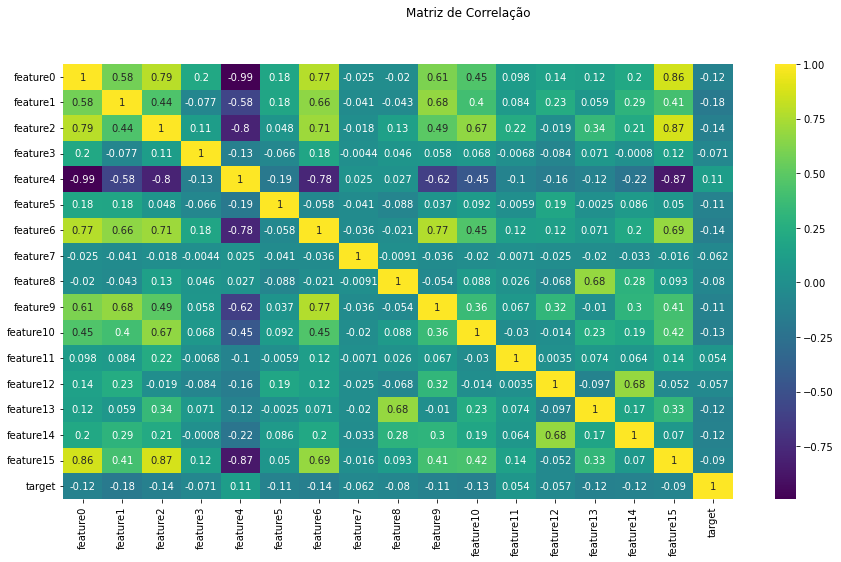

In [9]:
#Correlacionado as variáveis para verificar o grau de dependência

correlacao = df.corr()
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Matriz de Correlação')
sns.heatmap(correlacao,cmap='viridis',annot=True);

Quanto mais perto de 1 a nossa relação é mais forte e quanto mais perto de -1 nossa relação é mais fraca. Podemos notar que algumas features possuem relação muito boas, como é o caso da feature0 com a feature15 e mais fraca no caso da feature4 com a feature15.

Podemos tomar algumas ações baseado nas correlações, por exemplo normalmente 2 variáveis com correlação > 0.7 significa que você pode remover uma delas do dataset, alguns casos menos é mais. Quando vamos treinar o modelo, essas mesmas variáveis podem ter um peso maior, enviesando nosso treinamento, para evitar isso, as variáveis altamente correlacionadas são excluídas.

**Ações para ser realizado:**

A Feature 4 e a feature 15 tem correlação de -0.87, significa que podemos remover uma delas do dataset de treino. No caso, vamos remover a feature15 porque ela tem menor relação com o target (-0.09), enquanto a feature4 tem 0.11.

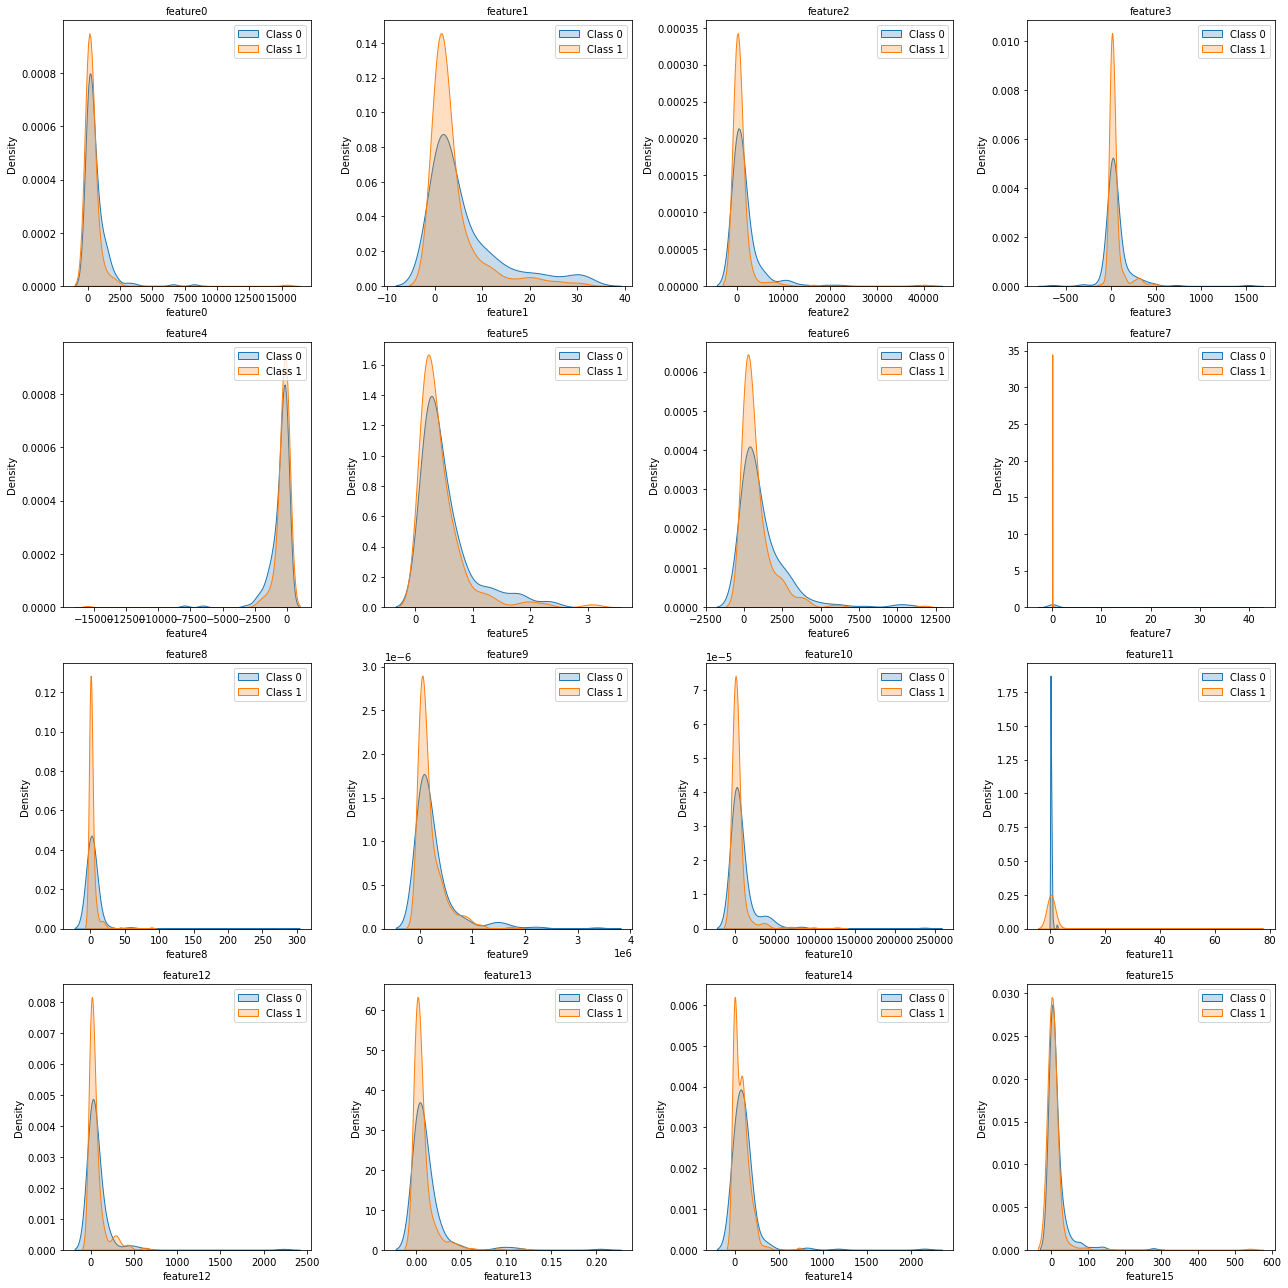

In [10]:
# Gráfico de Densidade
columns_names = df.drop(['target'],axis=1).columns
num_plots = len(columns_names)
df_class_0 = df[df.target==0]
df_class_1 = df[df.target==1]

fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(18,18))

idx = 0
for col in columns_names:
    idx += 1
    plt.subplot(4, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.legend()
    plt.title(col, fontsize=10)
plt.tight_layout()

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra. Veja como exemplo as variáveis feature7 e feature11 como elas são bem distintas.

Por outro lado, variáveis como feature0, feature4 , feature5 e feature15 são muito similares, apresentando aproximadamente o mesmo comportamento.

**Alguns Insights**

A feature15 tem praticamente a mesma distribuição para as duas classes, isso significa que ela sozinha não caracteriza tão bem as classes.

Por outro lado, a feature1 tem distribuições bem diferentes para cada classe. Isso significa que ela tem um poder preditivo maior por segmentar melhor as classes.

Utilizar gráficos de densidade ajuda a interpretar como os resultados que estamos observando podem afetar a tarefa de prever o target.


## Análise de Outliers

Agora vamos análisar os outliers que temos no nosso dataset. Para isso vamos utilizar o gráfico de boxplot.

O [boxplot](https://pt.wikipedia.org/wiki/Diagrama_de_caixa) é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis.

Já os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode causar anomalias nos resultados obtidos nos modelos de machine learning.

Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

Os outliers podem viesar negativamente todo o resultado de uma análise;
O comportamento dos outliers pode ser justamente o que está sendo procurado.

Vamos também utilizar a função percentile() para quantificar o percentil 99 de cada feature.

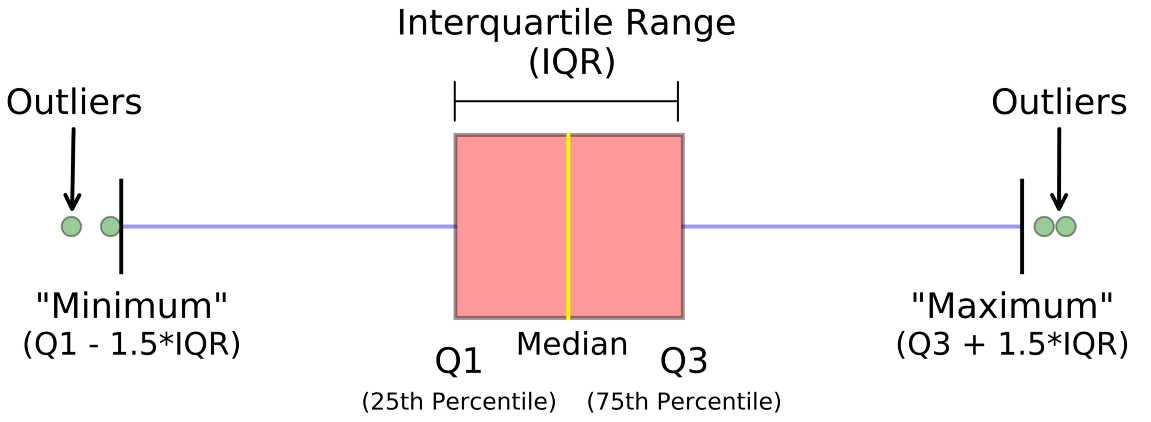

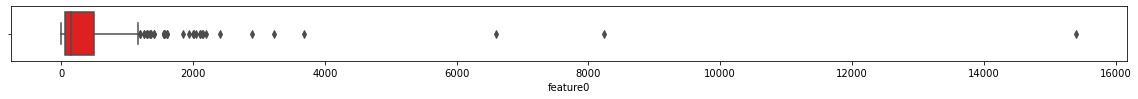

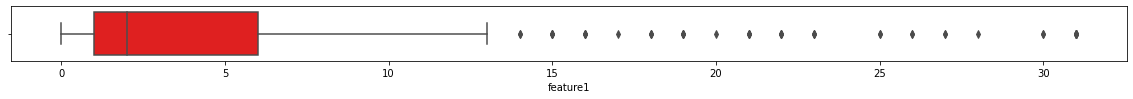

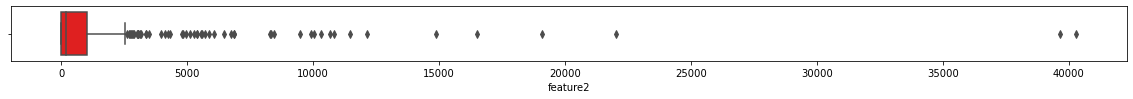

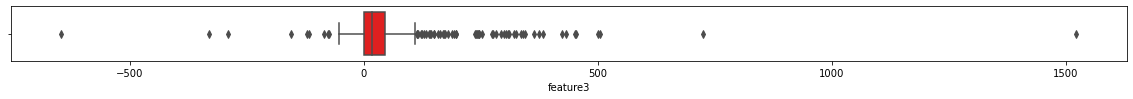

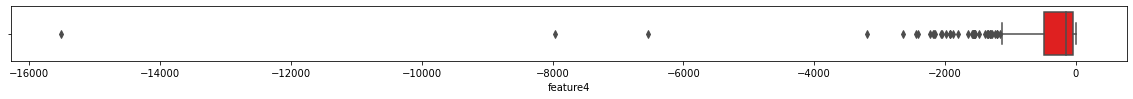

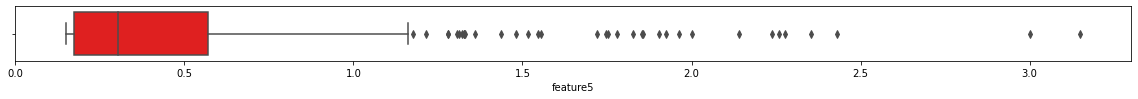

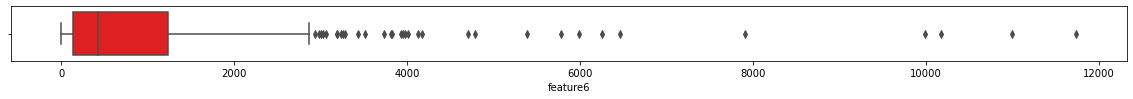

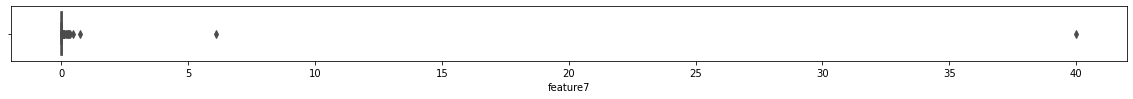

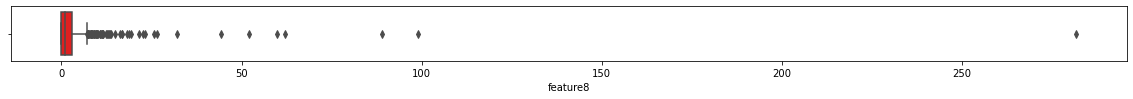

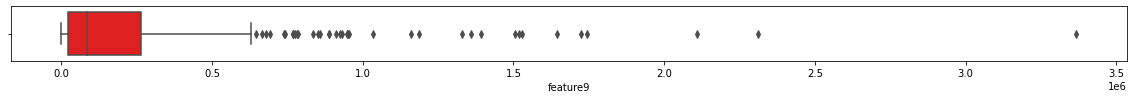

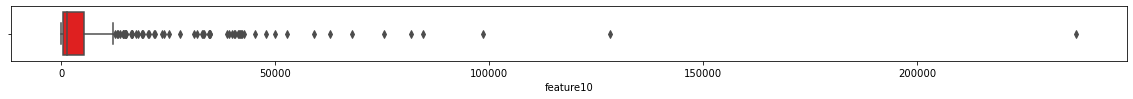

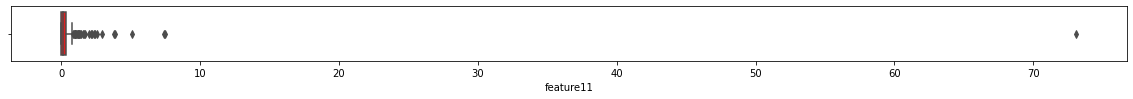

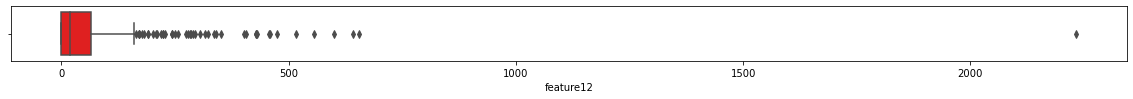

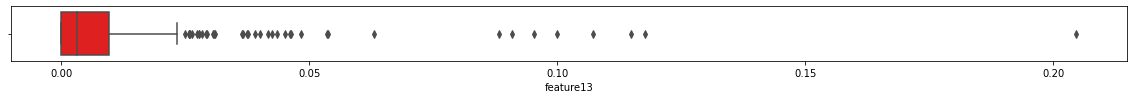

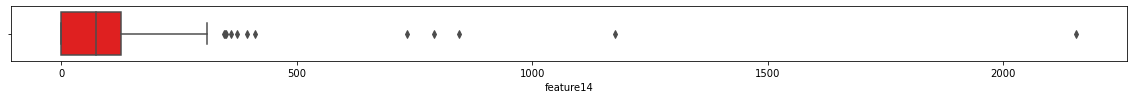

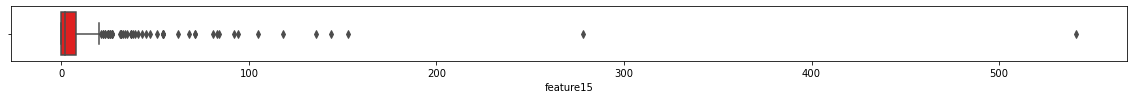

In [11]:
# Plotando o boxplot para todas as nossas features

df_box = df.drop(['target'],axis=1)

for column in df_box:
    plt.figure(figsize=(20,1))
    sns.boxplot(data=df_box, x=column,color='red')

In [12]:
# Calcular percentil 99 para cada feature
for perc in df_box:
    print(perc,':','\n','Percentil 99:',round(np.percentile(a=df_box[perc],q=99),2),
          '| Min:',round(df_box[perc].min(),2),'| Max:',round(df_box[perc].max(),2))

feature0 : 
 Percentil 99: 3013.75 | Min: 0.0 | Max: 15400.0
feature1 : 
 Percentil 99: 31.0 | Min: 0 | Max: 31
feature2 : 
 Percentil 99: 15461.71 | Min: 0.0 | Max: 40291.24
feature3 : 
 Percentil 99: 451.81 | Min: -645.87 | Max: 1521.9
feature4 : 
 Percentil 99: -0.89 | Min: -15506.35 | Max: -0.26
feature5 : 
 Percentil 99: 2.27 | Min: 0.15 | Max: 3.15
feature6 : 
 Percentil 99: 6964.15 | Min: 1 | Max: 11731
feature7 : 
 Percentil 99: 0.32 | Min: 0.0 | Max: 40.0
feature8 : 
 Percentil 99: 54.85 | Min: 0.0 | Max: 281.67
feature9 : 
 Percentil 99: 1672900.3 | Min: 1 | Max: 3366472
feature10 : 
 Percentil 99: 77619.51 | Min: 0.0 | Max: 237182.78
feature11 : 
 Percentil 99: 3.81 | Min: 0.0 | Max: 73.08
feature12 : 
 Percentil 99: 530.1 | Min: 0.0 | Max: 2232.1
feature13 : 
 Percentil 99: 0.1 | Min: 0.0 | Max: 0.2
feature14 : 
 Percentil 99: 524.39 | Min: 0.0 | Max: 2154.0
feature15 : 
 Percentil 99: 124.3 | Min: 0 | Max: 541


**Analisando os outliers**

Após visualizar os bloxplots e calcular o percentil de cada feature foi possível identificar outliers. Alguns estão muito acima do percentil 99.

**Ação**

Todas as features tem outliers, como ação vamos retirar esses outliers do dataset e ver como o modelo vai se comportar sem estes outliers no processo de treino.

**Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:**

* O dataset está balanceado;
* Não existem valores ausentes ou nulos no dataset;
* Algumas features estão como int, e precisam ser modificadas para float, quando existe dados ausentes a feature pode está como float, o que não é nosso caso;
* Possuimos outliers nas features, vamos realizar o tratamento desses dados.

## Preparando os dados

Para que os dados possam alimentar os modelos que iremos construir, nesta etapa de preparação iremos:

* Padronizar as feature int para float que está em outro tipo de dados;
* Remover os outliers;
* Dividir entre dados de treino e teste.

Para esta etapa de transformação iremos utilizar o metódo astype().

In [13]:
# Modificando as features de int para flot

df['feature1'] = df['feature1'].astype(float)
df['feature6'] = df['feature6'].astype(float)
df['feature9'] = df['feature9'].astype(float)
df['feature15'] = df['feature15'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 337 to 92
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   466 non-null    float64
 1   feature1   466 non-null    float64
 2   feature2   466 non-null    float64
 3   feature3   466 non-null    float64
 4   feature4   466 non-null    float64
 5   feature5   466 non-null    float64
 6   feature6   466 non-null    float64
 7   feature7   466 non-null    float64
 8   feature8   466 non-null    float64
 9   feature9   466 non-null    float64
 10  feature10  466 non-null    float64
 11  feature11  466 non-null    float64
 12  feature12  466 non-null    float64
 13  feature13  466 non-null    float64
 14  feature14  466 non-null    float64
 15  feature15  466 non-null    float64
 16  target     466 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 81.7 KB


Todas as features estão com o mesmo formato de float, padronizando nosso dataset.
Agora que temos nosso dataset analisado e feito as transformações, vamos dividi-lo entre treino e teste utilizando a biblioteca scikit-learn.

### Removendo os Outliers

Nessa etapa vamos remover os outliers e instanciar em um novo dataset para comparar no final a performance do modelo com e sem os outliers.

Vamos utilizar para a remoção o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

**IQR = Q3 - Q1**


In [14]:
# Definir uma função chamada "outliers" que retorna uma lista com index de outliers

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] < upper_bound)]
    
    return ls

In [15]:
# Criar uma lista vazia para armazenar os índices de saída das features

index_list = []
for feature in df_box.columns:
    index_list.extend(outliers(df,feature))
    

In [16]:
# Definir uma função chama "remove" que retorna um dataframe sem outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
    

In [17]:
# Instanciando novo dataset e verificando suas dimensões

df_new = remove(df,index_list)
print('O dataset com outliers contém {} linhas e {} colunas.'.format(df.shape[0],df.shape[1]))
print('O dataset sem outliers contém {} linhas e {} colunas.'.format(df_new.shape[0],df_new.shape[1]))
print('Redução de {} linhas no dataset'.format(df.shape[0]-df_new.shape[0]))

O dataset com outliers contém 466 linhas e 17 colunas.
O dataset sem outliers contém 374 linhas e 17 colunas.
Redução de 92 linhas no dataset


Obtivemos 92 linhas a menos no nosso dataset após a remoção dos outliers.

Após a etapa de realização de tratativa dos outliers no dataset vamos prosseguir para o partionamento dos dados em treino e teste.

## Particionando os Dados em Treino/Teste

In [18]:
# Separando os dados em teste e treino 

x=df.drop(['feature15','target'],axis=1)
y=df['target']

x_treino, x_teste, y_treino,y_teste  = train_test_split(x, y, test_size = 0.3,random_state = 1)

Separamos nosso dataset em x para variáveis independentes que são as features e y para nossa variável dependente a target.

* Utilizamos o train_test_split que faz parte da biblioteca scikit-learn e passados dois parâmetros:
   - O test_size onde dividimos em 30% do dataset para os dados de teste; 
   - E o random_state igual a 1, pois se não especificar o random_state no código, toda vez que você executar (executar) seu código, um novo valor aleatório será gerado e os conjuntos de dados de treinamento e teste terão valores diferentes a cada vez.

## Modelos de Machine Learning

**Modelo XGBoost**

O XGBoost é um algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting.

O nome XGBoost vem de eX*treme *Gradient Boosting, e representa uma categoria de algoritmo baseada em Decision Trees (árvores de decisão) com Gradient Boosting (aumento de gradiente).

Extremamente flexível – uma vez que possui um grande número de hiperparâmetros passíveis de aperfeiçoamento -, você consegue ajustar adequadamente o XGBoost para o cenário do seu problema, seja ele qual for.

O algoritmo xgboost possui parâmetros para classificação e regressão, para a nossa previsão de vendas utilizaremos o modelo XGBClassifier.

**Após o treino vamos definir hiper parâmetros para o modelo**

Após instanciar o modelo, o mesmo será treinado em cima dos dados em x_treino e y_treino. Na sequência, serão realizadas as previsões sobre os dados de teste e definição de melhores parãmetros para o modelo utilizando o GridSearchCV.

Para esse modelo valos definir os seguintes parâmetros com os determinados intervalos:
Na [documentação](https://xgboost.readthedocs.io/en/stable/parameter.html) podemos consultar a definição de cada parâmetro e seu significado para melhor conhecimento.

* min_child_weight: [1, 5, 10],
* subsample: [0.6, 0.8, 1.0],
* colsample_bytree: [0.6, 0.8, 1.0],
* max_depth: [3, 4, 5]

In [19]:
#Utilizando o algoritmo XGBoost

xgb = XGBClassifier();
xgb.fit(x_treino,y_treino);

# Fazer as previsões em cima dos dados de teste

y_pred_xgb = xgb.predict(x_teste)

# Score do modelo antes do tunning

print("Este é o resultado do modelo sem definir os parâmetros {:.4f}".format(xgb.score(x_teste,y_teste)))

# Definir parâmetros usando o gridsearch

xgb_parametros = {
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# Definir modelo novamente com grid seach

grid_searh = GridSearchCV(estimator=xgb,param_grid=xgb_parametros,scoring='accuracy')
grid_result = grid_searh.fit(x_treino,y_treino)

# Escolhendo os melhores parâmetros

final_model = xgb.set_params(**grid_result.best_params_)

# Treinar novamente com os melhores parâmetros

final_model.fit(x_treino,y_treino)

# Predição do modelo final

y_pred_xgb_final = final_model.predict(x_teste)

# Resultado da predição

print("Este é o resultado depois de definir os parâmetros {:.4f}".format(grid_searh.score(x_teste,y_teste)))

Este é o resultado do modelo sem definir os parâmetros 0.6071
Este é o resultado depois de definir os parâmetros 0.6143


Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.


Observe a matriz de confusão para ver a taxa de acertos para eventos que ocorreram, ou pela coluna recall do Relatório de Classificação.

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. No caso desse modelo de XGBoost Classifier, tem-se 65% de AUC.

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.5303    0.6034    0.5645        58
           1     0.6892    0.6220    0.6538        82

    accuracy                         0.6143       140
   macro avg     0.6097    0.6127    0.6092       140
weighted avg     0.6234    0.6143    0.6168       140

Acurácia: 0.6143

AUC: 0.6127



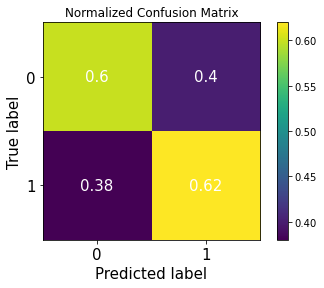

In [20]:
# Plotar a matriz de confusão

skplt.metrics.plot_confusion_matrix(y_teste,y_pred_xgb_final,normalize= True,cmap= 'viridis',text_fontsize=15)

# Imprimir relatório de classificação

print("Relatório de Classificação: \n",classification_report(y_teste,y_pred_xgb_final,digits=4))

# Imprimir acurácia do modelo

print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste,y_pred_xgb_final)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred_xgb_final)))

**Regressão Logística**

A regressão logística é uma modelo estatístico para situações em que a variável dependente é de natureza dicotômica ou
binária. Quanto às independentes, tanto podem ser categóricas ou não.

É semelhante à regressão linear, exceto que, em vez de um resultado gráfico, a variável de destino é binária; o valor é 1 ou 0.

A Regressão Logística é amplamente utilizada por ser extremamente eficiente e não necessitar de grandes quantidades de recursos computacionais. Pode ser interpretada facilmente e não precisa de escala de recursos de entrada. É simples de regularizar e as saídas que fornece são probabilidades previstas bem calibradas.

**Após o treino vamos definir hiper parâmetros para o modelo**

Após instanciar o modelo, o mesmo será treinado em cima dos dados em x_treino e y_treino. Na sequência, serão realizadas as previsões sobre os dados de teste e definição de melhores parâmetros para o modelo utilizando o GridSearchCV.

Para o modelo de Regressão Logística utilizamos somente o parâmetro **C** buscando multiplos de 10 para valores menores especificando uma regularização mais forte. Esse conceito pode ser consultado na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [21]:
#Utilizando o algoritmo LogisticRegression

lr = LogisticRegression(solver='liblinear');
lr.fit(x_treino,y_treino);

# Fazer as previsões em cima dos dados de teste

y_pred_lr = lr.predict(x_teste)

# Score do modelo antes do tunning

print("Este é o resultado do modelo sem definir os parâmetros {:.4f}".format(lr.score(x_teste,y_teste)))

# Definir parâmetros usando o gridsearch

lr_parametros = {
        'C':[0.001,0.01,0.1,1,10,100,1000]
        }

# Definir modelo novamente com grid seach

grid_searh_lr = GridSearchCV(estimator=lr,param_grid=lr_parametros,scoring='accuracy')
grid_result_lr = grid_searh_lr.fit(x_treino,y_treino)

# Escolhendo os melhores parâmetros

final_model_lr = lr.set_params(**grid_result_lr.best_params_)

# Treinar novamente com os melhores parâmetros

final_model_lr.fit(x_treino,y_treino)

# Predição do modelo final

y_pred_lr_final = final_model_lr.predict(x_teste)

# Resultado da predição

print("Este é o resultado depois de definir os parâmetros {:.4f}".format(grid_searh_lr.score(x_teste,y_teste)))

Este é o resultado do modelo sem definir os parâmetros 0.6286
Este é o resultado depois de definir os parâmetros 0.6357


Como nosso dataset é pequeno é necessário realizar a mudança de algoritmo para **liblinear**, visto que o padrão usado é **lbfgs**. Para pequenos datasets o liblinear é uma melhor escolha. A [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) tem mais informações sobre os algoritmos citados.

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

Aqui também valos avaliar a eficácia é a AUC ROC, ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 61% de AUC.

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.5714    0.4828    0.5234        58
           1     0.6703    0.7439    0.7052        82

    accuracy                         0.6357       140
   macro avg     0.6209    0.6133    0.6143       140
weighted avg     0.6294    0.6357    0.6299       140

Acurácia: 0.6357

AUC: 0.6133



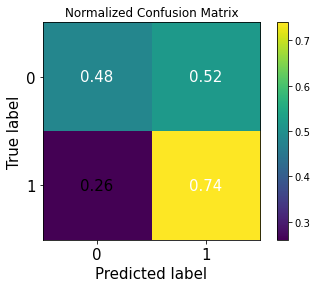

In [22]:
# Plotar a matriz de confusão

skplt.metrics.plot_confusion_matrix(y_teste,y_pred_lr_final,normalize= True,cmap= 'viridis',text_fontsize=15)

# Imprimir relatório de classificação

print("Relatório de Classificação: \n",classification_report(y_teste,y_pred_lr_final,digits=4))

# Imprimir acurácia do modelo

print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste,y_pred_lr_final)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred_lr_final)))

## Treinar modelos sem outliers

Para compararmos o desempenho dos modelos, vamos realizar agora o treino com os dados sem outliers.
Nessa etapa vamos fazer o tunning dos modelos conforme feito anteriormente.

### XGBoost sem outliers

In [27]:
# Separando os dados em teste e treino 

x=df_new.drop(['feature15','target'],axis=1)
y=df_new['target']

x_treino, x_teste, y_treino,y_teste  = train_test_split(x, y, test_size = 0.3,random_state = 1)

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.7419    0.4694    0.5750        49
           1     0.6829    0.8750    0.7671        64

    accuracy                         0.6991       113
   macro avg     0.7124    0.6722    0.6711       113
weighted avg     0.7085    0.6991    0.6838       113

Acurácia: 0.6991

AUC: 0.6722



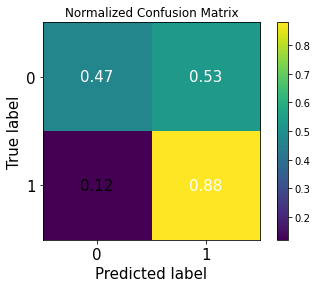

In [28]:
#Utilizando o algoritmo XGBoost

xgb = XGBClassifier();
xgb.fit(x_treino,y_treino);

# Fazer as previsões em cima dos dados de teste

y_pred_xgb = xgb.predict(x_teste)

# Definir parâmetros usando o gridsearch

xgb_parametros = {
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# Definir modelo novamente com grid seach

grid_searh = GridSearchCV(estimator=xgb,param_grid=xgb_parametros,scoring='accuracy')
grid_result = grid_searh.fit(x_treino,y_treino)

# Escolhendo os melhores parâmetros

final_model = xgb.set_params(**grid_result.best_params_)

# Treinar novamente com os melhores parâmetros

final_model.fit(x_treino,y_treino)

# Predição do modelo final

y_pred_xgb_final = final_model.predict(x_teste)

# Plotar a matriz de confusão

skplt.metrics.plot_confusion_matrix(y_teste,y_pred_xgb_final,normalize= True,cmap= 'viridis',text_fontsize=15)

# Imprimir relatório de classificação

print("Relatório de Classificação: \n",classification_report(y_teste,y_pred_xgb_final,digits=4))

# Imprimir acurácia do modelo

print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste,y_pred_xgb_final)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred_xgb_final)))

### Regressão Logística sem Outliers

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.5217    0.2449    0.3333        49
           1     0.5889    0.8281    0.6883        64

    accuracy                         0.5752       113
   macro avg     0.5553    0.5365    0.5108       113
weighted avg     0.5598    0.5752    0.5344       113

Acurácia: 0.5752

AUC: 0.5365



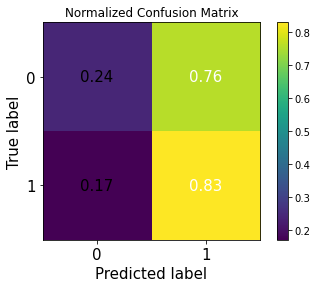

In [29]:
#Utilizando o algoritmo LogisticRegression

lr = LogisticRegression(solver='liblinear');
lr.fit(x_treino,y_treino);

# Fazer as previsões em cima dos dados de teste

y_pred_lr = lr.predict(x_teste)

# Definir parâmetros usando o gridsearch

lr_parametros = {
        'C':[0.001,0.01,0.1,1,10,100,1000]
        }

# Definir modelo novamente com grid seach

grid_searh_lr = GridSearchCV(estimator=lr,param_grid=lr_parametros,scoring='accuracy')
grid_result_lr = grid_searh_lr.fit(x_treino,y_treino)

# Escolhendo os melhores parâmetros

final_model_lr = lr.set_params(**grid_result_lr.best_params_)

# Treinar novamente com os melhores parâmetros

final_model_lr.fit(x_treino,y_treino)

# Predição do modelo final

y_pred_lr_final = final_model_lr.predict(x_teste)

# Plotar a matriz de confusão

skplt.metrics.plot_confusion_matrix(y_teste,y_pred_lr_final,normalize= True,cmap= 'viridis',text_fontsize=15)

# Imprimir relatório de classificação

print("Relatório de Classificação: \n",classification_report(y_teste,y_pred_lr_final,digits=4))

# Imprimir acurácia do modelo

print("Acurácia: {:.4f}\n".format(accuracy_score(y_teste,y_pred_lr_final)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, y_pred_lr_final)))

## Conclusão

Os dados importados estavam bem tratados, limpos, sem valores ausentes ou variáveis categóricas e as classes estavam bem balanceadas, entretanto possuíamos outliers.

Ao testar os modelos obtivemos uma acurácia de **0.6571** e AUC ROC de **0.6594** para o XGBoost, acurácia de **0.6071** para a Regressão Logística e AUC ROC de **0.6142** antes da tratativa dos outlier. Após a remoção dos outliers obtivemos uma acurácia de **0.6549** para o XGBoost e AUC ROC de **0.6307**, acurácia de **0.5752** para a Regressão Logística e AUC ROC de **0.5365**.

Esse resultado não significa que o modelo não foi bem, pode ser necessário somente um tratamento maior e melhor dos dados antes de partir para outro modelo.

Sobre a AUC ROC tivemos uma eficácia no aumento, se tratando do XGBoost, porém na Regressão Logística tivemos a sua diminuíção.
Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cuja as previsões são 100% corretas tem uma AUC de 1. Cada modelo apresentará um valor de AUC, o que irá te auxiliar na escolha do melhor.

Apesar do resultado final obtido com os modelos de XGBoost e Regressão Logística, há espaço para testar o desempenho com outros algoritmos de classificação, bem como otimizar seus parâmetros.


Comparando os dois modelos concluo que o XGBoost oferece melhor performance. Visto que sua acurácia e seu AUC ROC atingiram melhores resultados. Como ação continuaria ajustando seus parâmetros para atingir um auto desempenho nas suas métricas de avaliação.